In [1]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_frequency(image_patch):
    f_transform = np.fft.fft2(image_patch)
    f_transform_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)
    return np.mean(magnitude_spectrum)

def create_frequency_mask(image_path, patch_size=50):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    height, width = img.shape
    mask = np.zeros((height, width), dtype=np.uint8)
    frequencies = []

    for y in range(0, height - patch_size + 1, patch_size):
        for x in range(0, width - patch_size + 1, patch_size):
            patch = img[y:y+patch_size, x:x+patch_size]

            avg_frequency = compute_frequency(patch)
            frequencies.append(avg_frequency)

    # Calculate the average frequency_threshold
    average_frequency_threshold = np.mean(frequencies)
    print("average_frequency_threshold = ", average_frequency_threshold)
    print("max = ", max(frequencies))
    print("min = ", min(frequencies))


    for y in range(0, height - patch_size + 1, patch_size):
        for x in range(0, width - patch_size + 1, patch_size):
            patch = img[y:y+patch_size, x:x+patch_size]

            avg_frequency = compute_frequency(patch)

            if avg_frequency >= average_frequency_threshold:
                mask[y:y+patch_size, x:x+patch_size] = 255  # Set patch to white in the mask

    # Handle remaining rows and columns
    if height % patch_size != 0:
        for x in range(0, width - patch_size + 1, patch_size):
            patch = img[height - patch_size:height, x:x+patch_size]
            avg_frequency = compute_frequency(patch)
            if avg_frequency >= average_frequency_threshold:
                mask[height - patch_size:height, x:x+patch_size] = 255

    if width % patch_size != 0:
        for y in range(0, height - patch_size + 1, patch_size):
            patch = img[y:y+patch_size, width - patch_size:width]
            avg_frequency = compute_frequency(patch)
            if avg_frequency >= average_frequency_threshold:
                mask[y:y+patch_size, width - patch_size:width] = 255

    return mask


In [3]:
import re
def extract_numbers_from_filename(filename):
    # Use regular expression to find numbers in the filename
    match = re.search(r'\d+', filename)

    # If numbers are found, convert them to an integer
    if match:
        return int(match.group())
    else:
        return None

In [4]:
def remove_small_blobs(mask, min_blob_size):
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter out small contours (blobs)
    filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) >= min_blob_size]

    # Create an empty mask to draw the filtered contours
    filtered_mask = np.zeros_like(mask)

    # Draw the filtered contours on the mask
    cv2.drawContours(filtered_mask, filtered_contours, -1, 255, thickness=cv2.FILLED)

    return filtered_mask

In [6]:
import cv2
import os

average_frequency_threshold =  4.409714790976881
max =  5.656729585080069
min =  2.8645854250587246
/content/mask/img1/back_hr_mask.png
/content/mask/img1/back_lr_mask.png
/content/mask/img1/obj_hr_mask.png
/content/mask/img1/obj_lr_mask.png


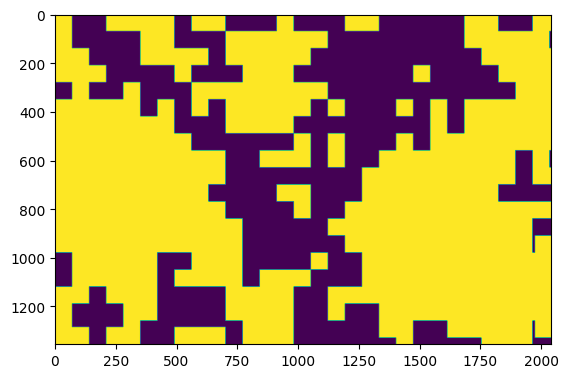

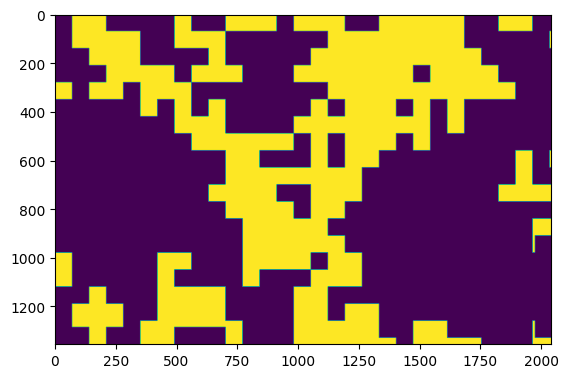

In [7]:
def create_mask(image_path):
  orig_img = cv2.imread(image_path)

  img = create_frequency_mask(image_path, 35)

  # plt.imshow(img, cmap = 'gray')
  # plt.show()

  min_blob_size = 80
  img = remove_small_blobs(img, min_blob_size)
  img = cv2.bitwise_not(img)
  # plt.imshow(img, cmap = 'gray')
  # plt.show()
  return img

src = "/drive/MyDrive/DIV2KRK_public/DIV2KRK/lr_x2"
dst = "/drive/MyDrive/kernelGAN_Experiments/masks/B_and_O_F_final"

files = os.listdir(src)

for file_name in files:
  image_path = os.path.join(src, file_name)
  img_num = extract_numbers_from_filename(file_name)
  dir_path = os.path.join(dst, 'img'+str(img_num))
  if not os.path.exists(dir_path):
    os.mkdir(dir_path)
  lr_back = create_mask(image_path)


  new_path_back_hr = os.path.join(dir_path, "back_hr_mask.png")
  new_path_back_lr = os.path.join(dir_path, "back_lr_mask.png")
  new_path_obj_hr = os.path.join(dir_path, "obj_hr_mask.png")
  new_path_obj_lr = os.path.join(dir_path, "obj_lr_mask.png")

  hr_back = cv2.resize(lr_back, dsize=[lr_back.shape[1]*2, lr_back.shape[0]*2], interpolation=cv2.INTER_CUBIC)
  hr_obj = cv2.bitwise_not(hr_back)
  lr_obj = cv2.bitwise_not(lr_back)

  cv2.imwrite(new_path_back_hr, hr_back)
  cv2.imwrite(new_path_back_lr, lr_back)

  cv2.imwrite(new_path_obj_hr, hr_obj)
  cv2.imwrite(new_path_obj_lr, lr_obj)
  print(new_path_back_hr)
  print(new_path_back_lr)
  print(new_path_obj_hr)
  print(new_path_obj_lr)
  import matplotlib.pyplot as plt

  plt.imshow(hr_obj)
  plt.show()
  plt.imshow(hr_back)
  plt.show()

  break

